<a href="https://colab.research.google.com/github/emrllh/My_works/blob/main/question_answering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## question-answering

the data even though subjqa['train']['answers'] already contains the answers.

Reasoning for modeling:

1. The Need for Generalization

The subjqa['train']['answers'] column provides answers for the specific questions in the training set.
Our goal is to build a model that can answer new, unseen questions about electronics (the topic of the dataset).
Simply having the answers for the training set doesn't allow us to generalize and answer questions the model hasn't encountered before.
2. Building a Question Answering System

We're aiming to create a question answering system, not just a lookup table of known answers.
A question answering system needs to understand the relationship between questions and context to find relevant answers.
This requires training a model to:
Process text: Understand the meaning of words, sentences, and paragraphs.
Identify relevant information: Locate the parts of the text that contain the answer.
Extract and formulate answers: Present the answer in a clear and concise way.
3. Learning Underlying Patterns

By training a model on the subjqa dataset, we're teaching it to recognize patterns and relationships between questions and answers in the context of electronics.
This allows the model to learn how to answer a wide range of questions, even if they are phrased differently from the training examples.
4. Evaluating Performance

Having a separate set of answers in subjqa['train']['answers'] allows us to evaluate the performance of our model.
We can compare the model's predicted answers to the ground truth answers to measure its accuracy and identify areas for improvement.
In summary: while subjqa['train']['answers'] provides the target answers for training, the goal is to build a model that can generalize and answer new questions. This requires training the model to understand the relationships between questions, context, and answers within the domain of electronics. The pre-existing answers are used for training and evaluating the model's performance.

In [1]:
# Suppress Haystack logging
import logging
for module in ["farm.utils", "farm.infer", "haystack.reader.farm.FARMReader",
              "farm.modeling.prediction_head", "elasticsearch", "haystack.eval",
               "haystack.document_store.base", "haystack.retriever.base",
              "farm.data_handler.dataset"]:
    module_logger = logging.getLogger(module)
    module_logger.setLevel(logging.ERROR)

In [2]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [3]:
from datasets import get_dataset_config_names
domains = get_dataset_config_names('subjqa')
domains

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/21.6k [00:00<?, ?B/s]

subjqa.py:   0%|          | 0.00/9.12k [00:00<?, ?B/s]

The repository for subjqa contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/subjqa.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


['books', 'electronics', 'grocery', 'movies', 'restaurants', 'tripadvisor']

In [4]:
# We are going to focus on electronics
from datasets import load_dataset

subjqa = load_dataset('subjqa', name='electronics')

data.zip:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1295 [00:00<?, ? examples/s]

/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future ve

Generating test split:   0%|          | 0/358 [00:00<?, ? examples/s]

/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future ve

Generating validation split:   0%|          | 0/255 [00:00<?, ? examples/s]

/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  if pd.unique(d["human_ans_spans"])[0] != "ANSWERNOTFOUND":
/root/.cache/huggingface/modules/datasets_modules/datasets/subjqa/2c12e496c4c675ab4a57ffb5d3f538f2e7b89793956e50da37126393ce23b6c6/subjqa.py:189: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future ve

In [11]:
subjqa['train'].info.description

'SubjQA is a question answering dataset that focuses on subjective questions and answers.\nThe dataset consists of roughly 10,000 questions over reviews from 6 different domains: books, movies, grocery,\nelectronics, TripAdvisor (i.e. hotels), and restaurants.'

In [17]:
subjqa['train']['question'][:10]

['How is the bass?',
 'Is this music song have a goo bass?',
 'How is the bass?',
 'How is the audio bass?',
 'Why do I have an incredible sound?',
 'What did the bass became?',
 'How is the quality of the bass?',
 'How is the time?',
 'Is documentation clear?',
 'How were the instructions?']

In [21]:
subjqa['train']['answers'][:10]

[{'text': [],
  'answer_start': [],
  'answer_subj_level': [],
  'ans_subj_score': [],
  'is_ans_subjective': []},
 {'text': ['Bass is weak as expected',
   'Bass is weak as expected, even with EQ adjusted up'],
  'answer_start': [1302, 1302],
  'answer_subj_level': [1, 1],
  'ans_subj_score': [0.5083333253860474, 0.5083333253860474],
  'is_ans_subjective': [True, True]},
 {'text': ['The only fault in the sound is the bass'],
  'answer_start': [650],
  'answer_subj_level': [2],
  'ans_subj_score': [0.6333333253860474],
  'is_ans_subjective': [True]},
 {'text': ['the best of all of them'],
  'answer_start': [1609],
  'answer_subj_level': [1],
  'ans_subj_score': [0.30000001192092896],
  'is_ans_subjective': [False]},
 {'text': ['The sound is so crisp', 'crazy obsession with sound and music'],
  'answer_start': [141, 38],
  'answer_subj_level': [1, 1],
  'ans_subj_score': [0.40833333134651184, 0.40833333134651184],
  'is_ans_subjective': [False, False]},
 {'text': ['that had terrible bas

In [18]:
subjqa.items()

dict_items([('train', Dataset({
    features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
    num_rows: 1295
})), ('test', Dataset({
    features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
    num_rows: 358
})), ('validation', Dataset({
    features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
    num_rows: 255
}))])

In [22]:
import pandas as pd
dfs = {split: dset.to_pandas() for split, dset in subjqa.flatten().items()}
dfs['train'].sample(5)


,domain,nn_mod,nn_asp,query_mod,query_asp,q_reviews_id,question_subj_level,ques_subj_score,is_ques_subjective,review_id,id,title,context,question,answers.text,answers.answer_start,answers.answer_subj_level,answers.ans_subj_score,answers.is_ans_subjective
842,electronics,stiff,hinge,adjustable,stand,41efb706cfae16b193b1f448db6ad98c,2,0.0,False,1c66153596a9e3da7faf1eadaf7605a0,ff2845abbf68070ed26535b192c7c661,B005HMO6A6,Granted it is a fairly inexpensive BT keyboard...,What should be done with the stands?,[],[],[],[],[]
1068,electronics,good,performance,amazing,speed,8c44ebe618ed06a93651f54a082bad7b,3,0.0,False,1ea258dd59c0140fb2ccd25b974d6692,a507c764c45b3b51b50c6fbb5ea7cb27,B0088CJT4U,This is the router I'm currently using in my h...,How would you rate the speed of the product?,"[Everything was kept constant for all tests, E...","[560, 604]","[3, 3]","[0.33333334, 0.33333334]","[False, False]"
179,electronics,sturdy,mount,solid,mount,eb064e62abf1b786bc9c1d9ef07f014d,1,0.1,False,bc11ebe17caaaba64cc0f5178b0c90eb,2fd8593b4b817011112d69582ff13e9a,B000WYVBR0,This mount was sturdy for my 26&#34; lcd tv an...,Does this mount solid?,[],[],[],[],[]
278,electronics,easy,instruction,easy to understand,instruction,1131eb0f505cfdc3028ca5e1056e8358,1,0.0,False,320a8827fc284a7e31f19cd144d1f750,0a6926f7eb2541d0cbd0133352954aac,B001TIG36C,Couldn't believe when I opened this that I got...,How is the instruction like?,[The instructions were SUPER easy],[184],[1],[0.75],[True]
780,electronics,great,thing,good,life,91cc74129566ee997f6b2b9e9516d17a,1,0.0,False,7bda91795faa5ba88d9eaf7d4918ede3,65ae4fc9a95f4ed9af7d3e02300d656e,B005CLPP84,"I bought the Roku for 2 reasons. First, I wan...",What about life ?,[],[],[],[],[]


In [ ]:
for split, df in dfs.items():
  print(f"Number of Questions in {split}: {df['id'].nunique()}")

Number of Questions in train: 1295
Number of Questions in test: 358
Number of Questions in validation: 255


In [25]:
qa_cols = ["title", "question", "answers.text",
           "answers.answer_start", "context"]

sample_df = dfs['train'][qa_cols].sample(5, random_state=7)
sample_df

,title,question,answers.text,answers.answer_start,context
791,B005DKZTMG,Does the keyboard lightweight?,[this keyboard is compact],[215],I really like this keyboard. I give it 4 star...
1159,B00AAIPT76,How is the battery?,[],[],I bought this after the first spare gopro batt...
961,B0074BW614,How is the cell phone screen?,[The interface takes a few tries to get used t...,[535],"Don't get me wrong, I love my e-ink kindle to ..."
1188,B00BGGDVOO,Do you have any computer with mouse?,[],[],After deciding to ditch cable TV I started to ...
999,B007P4VOWC,How is the camera?,[],[],I purchased the Tab 2 for my fianc&eacute; and...


In [30]:
sample_df['answers.text'].iloc[0][0]

'this keyboard is compact'

In [27]:

end_idx = len(sample_df['answers.text'].iloc[0][0])
end_idx

24

In [32]:
start_idx = sample_df['answers.answer_start'].iloc[0][0]
end_idx = start_idx + len(sample_df['answers.text'].iloc[0][0])
#print(end_idx)
sample_df['context'].iloc[0][start_idx:end_idx]


'this keyboard is compact'

In [35]:
end_idx

np.int32(239)

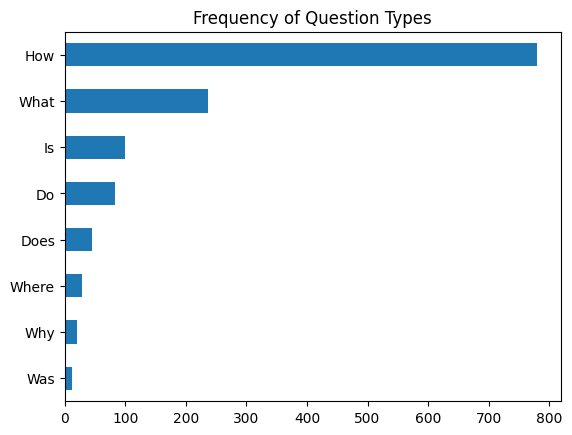

In [37]:
import matplotlib.pyplot as plt
counts ={}

question_types = ["What", "How", "Is", "Does", "Do", "Was", "Where", "Why"]

for q in question_types:
  counts[q] = dfs['train']['question'].str.startswith(q).value_counts()[True]
  #print(counts)

pd.Series(counts).sort_values().plot.barh()
plt.title('Frequency of Question Types')
plt.show()

In [39]:
for question_type in ["How", "What", "Is"]:
    for question in (
        dfs["train"][dfs["train"].question.str.startswith(question_type)]
        .sample(n=3, random_state=42)['question']):
        print(question)


How is the camera?
How do you like the control?
How fast is the charger?
What is direction?
What is the quality of the construction of the bag?
What is your impression of the product?
Is this how zoom works?
Is sound clear?
Is it a wireless keyboard?


### Extracting Answers from Text

#### Tokenizing text for QA

In [40]:
from transformers import AutoTokenizer

model_ckpt = "deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/107 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [41]:
# To see model in action we try a short text for answers
import pandas as pd
question = "How much music can this hold?"
context = """An MP3 is about 1 MB/minute, so about 6000 hours depending on \
file size."""

inputs = tokenizer(question, context, return_tensors='pt')
inputs

{'input_ids': tensor([[  101,  2129,  2172,  2189,  2064,  2023,  2907,  1029,   102,  2019,
         23378,  2003,  2055,  1015, 16914,  1013,  3371,  1010,  2061,  2055,
         25961,  2847,  5834,  2006,  5371,  2946,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]])}

In [42]:
input_df = pd.DataFrame.from_dict(tokenizer(question,context), orient='index')
input_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
input_ids,101,2129,2172,2189,2064,2023,2907,1029,102,2019,...,2061,2055,25961,2847,5834,2006,5371,2946,1012,102
token_type_ids,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
attention_mask,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [43]:
print(tokenizer.decode(inputs.input_ids[0]))
print(tokenizer.decode(inputs.token_type_ids[0]))
print(tokenizer.decode(inputs.attention_mask[0]))

[CLS] how much music can this hold? [SEP] an mp3 is about 1 mb / minute, so about 6000 hours depending on file size. [SEP]
[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0]
[unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0] [unused0]


In [44]:
# Instatiate the model with QA head and run the input through the forward pass
import torch
from transformers import AutoModelForQuestionAnswering

model = AutoModelForQuestionAnswering.from_pretrained(model_ckpt)

with torch.no_grad():
  outputs = model(**inputs) # The ** unpacks the dictionary into keyword arguments
  print(outputs)

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/minilm-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-0.9862, -4.7750, -5.4025, -5.2378, -5.2863, -5.5117, -4.9819, -6.1880,
         -0.9862,  0.2596, -0.2144, -1.7136,  3.7806,  4.8561, -1.0546, -3.9097,
         -1.7374, -4.5944, -1.4278,  3.9949,  5.0391, -0.2018, -3.0193, -4.8549,
         -2.3107, -3.5110, -3.5713, -0.9862]]), end_logits=tensor([[-0.9623, -5.4733, -5.0326, -5.1639, -5.4278, -5.5151, -5.1749, -4.6233,
         -0.9623, -3.7855, -0.8715, -3.7745, -3.0161, -1.1780,  0.1758, -2.7365,
          4.8934,  0.3046, -3.1761, -3.2762,  0.8937,  5.6606, -0.3623, -4.9554,
         -3.2531, -0.0914,  1.6211, -0.9623]]), hidden_states=None, attentions=None)


In [45]:
print(f' Start logits: {outputs.start_logits}')
print(f' End logits: {outputs.end_logits}')

 Start logits: tensor([[-0.9862, -4.7750, -5.4025, -5.2378, -5.2863, -5.5117, -4.9819, -6.1880,
         -0.9862,  0.2596, -0.2144, -1.7136,  3.7806,  4.8561, -1.0546, -3.9097,
         -1.7374, -4.5944, -1.4278,  3.9949,  5.0391, -0.2018, -3.0193, -4.8549,
         -2.3107, -3.5110, -3.5713, -0.9862]])
 End logits: tensor([[-0.9623, -5.4733, -5.0326, -5.1639, -5.4278, -5.5151, -5.1749, -4.6233,
         -0.9623, -3.7855, -0.8715, -3.7745, -3.0161, -1.1780,  0.1758, -2.7365,
          4.8934,  0.3046, -3.1761, -3.2762,  0.8937,  5.6606, -0.3623, -4.9554,
         -3.2531, -0.0914,  1.6211, -0.9623]])


**start_logits and End_logits**:  Logits are basically the raw scores the model assigns to each token (word or sub-word) in the input text, indicating the likelihood of that token being the start of the answer.
 By finding the words with the highest start and end scores, the model can identify the span of text that most likely contains the answer.

In [46]:
print(f"Input IDs shape: {inputs.input_ids.size()}")
print(f"Start logits shape: {outputs.start_logits.size()}")
print(f"End logits shape: {outputs.end_logits.size()}")

Input IDs shape: torch.Size([1, 28])
Start logits shape: torch.Size([1, 28])
End logits shape: torch.Size([1, 28])


In [47]:
import numpy as np
import matplotlib.pyplot as plt

s_scores = outputs.start_logits.detach().numpy().flatten()
print(s_scores)
e_scores = outputs.end_logits.detach().numpy().flatten()
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
print(tokens)

[-0.98621136 -4.7750025  -5.402534   -5.2377663  -5.2862816  -5.511734
 -4.981948   -6.1880236  -0.9862191   0.25958866 -0.21436964 -1.7135692
  3.7806444   4.856111   -1.0546368  -3.909694   -1.7373977  -4.5943604
 -1.427834    3.9949083   5.039053   -0.20180076 -3.0192864  -4.8549123
 -2.3107445  -3.510998   -3.571287   -0.9862095 ]
['[CLS]', 'how', 'much', 'music', 'can', 'this', 'hold', '?', '[SEP]', 'an', 'mp3', 'is', 'about', '1', 'mb', '/', 'minute', ',', 'so', 'about', '6000', 'hours', 'depending', 'on', 'file', 'size', '.', '[SEP]']


In [50]:
# Get Final asnwer
start_idx = np.argmax(outputs.start_logits)
print(start_idx)
start_t = tokenizer.decode(start_idx)
print(start_t)
end_idx = np.argmax(outputs.end_logits) + 1 #for slicing end excluded
print(end_idx)
end_t = tokenizer.decode(end_idx)
print(end_t)

answer_span = inputs['input_ids'][0][start_idx:end_idx]
print(answer_span)
answer = tokenizer.decode(answer_span)
print(answer)
print(f'Question: {question}')
print(f'Answer: {answer}')

tensor(20)
[unused19]
tensor(22)
[unused21]
tensor([25961,  2847])
6000 hours
Question: How much music can this hold?
Answer: 6000 hours


In [51]:
# Instantiate a pipeline for our example
from transformers import pipeline
pipe = pipeline("question-answering", model=model, tokenizer=tokenizer)
pipe(question=question, context=context, topk=3)

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:334: UserWarning: topk parameter is deprecated, use top_k instead
  warnings.warn("topk parameter is deprecated, use top_k instead", UserWarning)


[{'score': 0.265162855386734, 'start': 38, 'end': 48, 'answer': '6000 hours'},
 {'score': 0.22082918882369995,
  'start': 16,
  'end': 48,
  'answer': '1 MB/minute, so about 6000 hours'},
 {'score': 0.10253456234931946,
  'start': 16,
  'end': 27,
  'answer': '1 MB/minute'}]

### Dealing with long passages

In [52]:
def compute_input_length(row):
  inputs = tokenizer(row['question'], row['context'])
  return len(inputs['input_ids'])

dfs['train']['n_tokens'] = dfs['train'].apply(compute_input_length, axis=1)
dfs['train'].sample(5)

,domain,nn_mod,nn_asp,query_mod,query_asp,q_reviews_id,question_subj_level,ques_subj_score,is_ques_subjective,review_id,id,title,context,question,answers.text,answers.answer_start,answers.answer_subj_level,answers.ans_subj_score,answers.is_ans_subjective,n_tokens
621,electronics,great,coverage,easy to setup,router,029e9f59590414c2ddfb71b75addf2d3,1,0.0,False,d250c1f26b14023704b923dff966188f,093732dc3bc19ea563eb49f9a0fd4994,B0044YU60M,I'm another very happy customer. The router h...,How does the router work?,[The router has great speed and coverage],[34],[1],[0.75],[True],259
296,electronics,slow,write speed,fine,price,1bd833b1fe85bdc6e474b67bc973d988,4,0.0,False,eb7c1de28a6a5872ecbff0b95c8c74a9,0818537ad315cc9bb4d3926716e76ed3,B001XURP7W,I bought this knowing the write speeds were ve...,What is the price of the collection?,[],[],[],[],[],187
729,electronics,great,seller,same,specs,a9aa4620b6f326375d084299e85f4d48,5,0.0,False,c14896dc41d514ac2e08a0a702a09803,e3ff2b64574b793788d296106cdb809d,B004XZL980,It was and excellent tablet and I loved it how...,How about the specs?,[],[],[],[],[],105
713,electronics,straightforward,installation,easy to install,unit,23eba132c4f05523b8d91db018997a12,2,0.0,False,00167698e78c23dbba29d434d9d79589,9f05172b22edeaaee99c0cd99991a930,B004T9RR6I,"The N300 is an entry level router, but for mos...",How is the unit?,[],[],[],[],[],261
1120,electronics,similar,control,excellent,detail,c4bb1c129d3339493b50c32fd69ee9cc,1,0.0,False,104f67407d594cb21dad5bf0c3352e73,e6c4b17e86562defa3704817e6fda2e9,B0099XGZXA,Update (09/27/2012): I played more with high I...,What do you think about detail?,[],[],[],[],[],753


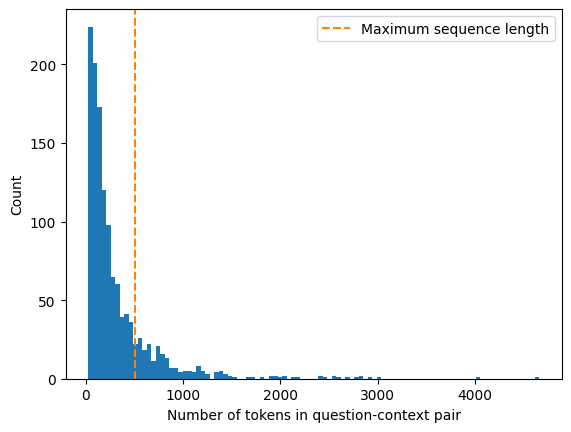

In [56]:
#Visualise  the lengths
dfs["train"]["n_tokens"] = dfs["train"].apply(compute_input_length, axis=1)

fig, ax = plt.subplots()
dfs["train"]["n_tokens"].hist(bins=100, grid=False, ec="C0", ax=ax)
plt.xlabel("Number of tokens in question-context pair")
ax.axvline(x=512, ymin=0, ymax=1, linestyle="--", color="C1",
           label="Maximum sequence length")
plt.legend()
plt.ylabel("Count")
plt.show()


In [65]:
from IPython.display import Image
url='https://raw.githubusercontent.com/nlp-with-transformers/notebooks/0cb211095b4622fa922f80fbdc9d83cc5d9e0c34/images/chapter07_sliding-window.png'

Image(url=url,width=620)

In [68]:
example = dfs['train'].iloc[0][['question','context']]
tokenized_example = tokenizer(example['question'], example['context'],
                              return_overflowing_tokens=True, max_length=100,
                              stride=25)
tokenized_example

{'input_ids': [[101, 2129, 2003, 1996, 3321, 1029, 102, 1045, 2031, 2018, 12849, 4757, 2132, 19093, 1999, 1996, 2627, 1010, 4013, 26424, 2050, 1998, 1053, 2480, 1011, 5585, 1012, 1996, 12849, 4757, 3417, 9331, 3217, 2003, 12109, 1998, 2038, 2307, 3321, 3433, 1012, 1996, 2147, 2307, 2007, 2026, 11924, 3042, 1998, 2064, 2022, 1000, 4565, 2039, 1000, 2000, 2022, 3344, 1999, 2026, 9055, 6598, 2030, 3274, 4524, 2302, 2893, 24514, 2098, 1012, 2027, 2024, 2200, 2422, 1998, 2079, 2025, 2514, 3082, 2030, 4562, 2091, 2006, 2115, 5551, 2130, 2044, 5962, 2000, 2189, 2007, 2068, 2006, 2035, 2154, 1012, 1996, 2614, 2003, 102], [101, 2129, 2003, 1996, 3321, 1029, 102, 1998, 2079, 2025, 2514, 3082, 2030, 4562, 2091, 2006, 2115, 5551, 2130, 2044, 5962, 2000, 2189, 2007, 2068, 2006, 2035, 2154, 1012, 1996, 2614, 2003, 2305, 1998, 2154, 2488, 2084, 2151, 4540, 1011, 13007, 2071, 2022, 1998, 2024, 2471, 2004, 2204, 2004, 1996, 4013, 26424, 2050, 1012, 2027, 2024, 1000, 2330, 2250, 1000, 2132, 19093, 2061,

In [70]:
for idx, window in enumerate(tokenized_example['input_ids']):
  print(f"window {idx} has {len(window)} tokens")


windo 0 has 100 tokens
windo 1 has 88 tokens


In [75]:
for windows in tokenized_example['input_ids']:
  print(f"{tokenizer.decode(windows)} \n")

[CLS] how is the bass? [SEP] i have had koss headphones in the past, pro 4aa and qz - 99. the koss portapro is portable and has great bass response. the work great with my android phone and can be " rolled up " to be carried in my motorcycle jacket or computer bag without getting crunched. they are very light and do not feel heavy or bear down on your ears even after listening to music with them on all day. the sound is [SEP] 

[CLS] how is the bass? [SEP] and do not feel heavy or bear down on your ears even after listening to music with them on all day. the sound is night and day better than any ear - bud could be and are almost as good as the pro 4aa. they are " open air " headphones so you cannot match the bass to the sealed types, but it comes close. for $ 32, you cannot go wrong. [SEP] 

